### In case of positive hydrostatic strain i.e $\text{tr}(\boldsymbol{\epsilon})\geq 0$
$\langle p \rangle_+ = p = \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}: \mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$    and      $\langle p \rangle_- = 0 $

$\mathbb{C}_{mod} = \mathbb{C}_{+} = s^2\left(\mathbb{I}_{vol}\mathbb{C} + \mathbb{I}_{dev}\mathbb{C}\right) = s^2 \mathbb{C}$

### In case of negative hydrostatic strain $\text{tr}(\boldsymbol{\epsilon})< 0$
$\langle p \rangle_+ = 0 $   and    $\langle p \rangle_- = p =  \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}:\mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$

$\mathbb{C}_{mod} = \mathbb{C}_{-} = s^2\bigl(\mathbb{I}_{dev}\mathbb{C}\bigr) + \mathbb{I}_{vol}\mathbb{C}$

 ## Strong Form in terms of $\mathbb{C}_{mod}$ and $\mathcal{H}(\mathcal{E})$
 
 $\nabla \cdot \boldsymbol{\sigma} = {\bf{0}}$
 
 $ \nabla\cdot \boldsymbol{D}  = {0}$

 $ \nabla \cdot \biggl(G_cl\boldsymbol{A}\nabla s\biggr) - 2s\mathcal{H}(\mathcal{E})  + \frac{G_c}{l}\left(1-s\right) = 0$

where 

$\boldsymbol{\sigma} = \biggl(\mathbb{C}_{mod} \boldsymbol{\epsilon} -\mathbb{e}_{mod}^T\boldsymbol{E}\biggr) $

$\boldsymbol{D} = \biggr({\boldsymbol{K}_{mod}\boldsymbol{E}} +  \mathbb{e}_{mod}\boldsymbol{\epsilon}\biggl) $

$\mathcal{E} = \frac{1}{2}\biggl(\langle p \rangle_+\boldsymbol{I}:\mathbb{I}_{vol}\boldsymbol{\epsilon} + \mathbb{I}_{dev}\mathbb{C}\boldsymbol{\epsilon}:\mathbb{I}_{dev}\boldsymbol{\epsilon} + \boldsymbol{E} \cdot \boldsymbol{K}\boldsymbol{E} + \boldsymbol{\epsilon}:\mathbb{e}^T\boldsymbol{E}\biggr)$

$\mathcal{H}(f) = \text{max}_{\tau \in [0,t]}f(\tau)$

$\mathbb{e}_{mod} = s^2 \mathbb{e}$

$\boldsymbol{K}_{mod} = s^2 \boldsymbol{K}$

 # Weak Form

### For Piezo-elasticity part

 $a((\boldsymbol{u},\phi), ({\boldsymbol{v}},{\psi})) = \int_{\Omega} \bigl( \mathbb{C}_{mod}\mathbb{\epsilon}: \nabla \boldsymbol{v} \bigr)d\Omega - \int_\Omega \bigl ( \boldsymbol{e}_{mod}^T\boldsymbol{E}:\nabla \boldsymbol{v}\bigr)d\Omega + \int_{\Omega}\left(\boldsymbol{K}_{mod}\boldsymbol{E} \cdot \nabla \boldsymbol{\psi}\right) + \int_{\Omega}\left(\mathbb{e}_{mod}\boldsymbol{\epsilon}  \cdot \nabla  \boldsymbol{\psi}\right)d\Omega$

### For phase-field part
 
 $ a(s,\phi) = \int_{\Omega}\bigl(G_cl\nabla s \cdot \nabla \phi + 2s \phi\mathcal{H}({\mathcal{E}}) +  \frac{G_c}{l} s \phi\bigr)d\Omega$

 $ l(\phi) = \int_{\Omega}\frac{G_c}{l}\phi d{\Omega}$

In [1]:
using Gmsh: gmsh

In [2]:
using GridapGmsh
using Gridap
using Gridap.Geometry
using Gridap.TensorValues
using Plots

In [3]:
using SymPy

x,x₁ = symbols("x,x₁", real = true)

heaviside(x) = 0.5 * (sign(x) + 1)
interval(x, a, b) = heaviside(x-a) - heaviside(x-b)

interval (generic function with 1 method)

## Definitions of Tensorial Quantities:

$\boldsymbol{I} = \delta_{ij} \boldsymbol{e}_i\otimes\boldsymbol{e}_j$

$\mathbb{I} = \boldsymbol{I}\otimes\boldsymbol{I}$

$\mathbb{I}_{sym} = \frac{1}{2}\biggl(\mathbb{I}+\mathbb{I}^T\biggr)$

$\mathbb{I}_{skw} = \frac{1}{2}\biggl(\mathbb{I}-\mathbb{I}^T\biggr)$

$\mathbb{I}_{vol} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)$

$\mathbb{I}_{dev} = \mathbb{I}_{sym} - \mathbb{I}_{vol}$

$\boldsymbol{\epsilon}_{vol} = \frac{1}{3}\text{tr}(\boldsymbol{\epsilon}) \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\epsilon}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\epsilon} = \mathbb{I}_{vol} \boldsymbol{\epsilon} $

$\boldsymbol{\epsilon}_{dev} = \boldsymbol{\epsilon} - \boldsymbol{\epsilon}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\epsilon} = \mathbb{I}_{dev} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{vol} = p \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\sigma}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\sigma} = \mathbb{I}_{vol} \boldsymbol{\sigma} = \mathbb{I}_{vol}\mathbb{C} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{dev} = \boldsymbol{\sigma} - \boldsymbol{\sigma}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\sigma} = \mathbb{I}_{dev} \boldsymbol{\sigma}=\mathbb{I}_{dev} \mathbb{C} \boldsymbol{\epsilon}$

In [4]:
I2 = SymTensorValue{2,Float64}(1.0 ,0.0 ,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/2)*I4
I4_dev = I4_sym  - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.5, 0.0, -0.5, 0.0, 0.5, 0.0, -0.5, 0.0, 0.5)

In [5]:
const L = 19.1e-3
const LL = (0.5*L)-0.002
const SO = 1e-3
#const SI = 0.05
const H = 9e-3
const CH = 4e-3       #Crack height
const CW = 0.46e-3    #Crack Width
const lsp = 0.2e-3   #length factor
const hf = 0.06e-3/2.1 #Mesh size parameter
const hfc = 0.06e-3/50 #Mesh size parameter
const h = 50*hf    #Mesh size parameter
const LW = CW
const FMR = CW/2

gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
p1 = gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h)
p2 = gmsh.model.geo.addPoint(SO, 0, 0.0, h)
p3 = gmsh.model.geo.addPoint(LL-0.5*CW, 0, 0.0, h)
p4 = gmsh.model.geo.addPoint(LL-0.5*CW, CH-CW, 0.0, h)
p5 = gmsh.model.geo.addPoint(LL, CH, 0.0, hfc)
p6 = gmsh.model.geo.addPoint(LL+0.5*CW, CH-CW, 0.0, h)
p7 = gmsh.model.geo.addPoint(LL+0.5*CW,0.0, 0.0, h)
p8 = gmsh.model.geo.addPoint(L-SO,0.0, 0.0, h)
p9 = gmsh.model.geo.addPoint(L,0.0, 0.0, h)
p10 = gmsh.model.geo.addPoint(L, H, 0.0, h)
p11 = gmsh.model.geo.addPoint((L/2)+LW, H , 0.0, h)
p12 = gmsh.model.geo.addPoint((L/2)-LW, H , 0.0, h)
p13 = gmsh.model.geo.addPoint(0, H , 0.0, h)

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p5)
l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p7)
l7 = gmsh.model.geo.addLine(p7, p8)
l8 = gmsh.model.geo.addLine(p8, p9)
l9 = gmsh.model.geo.addLine(p9, p10)
l10 = gmsh.model.geo.addLine(p10, p11)
l11 = gmsh.model.geo.addLine(p11, p12)
l12 = gmsh.model.geo.addLine(p12, p13)
l13 = gmsh.model.geo.addLine(p13, p1)                 

cl1 = gmsh.model.geo.addCurveLoop([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13]) 

ps1 = gmsh.model.geo.addPlaneSurface([cl1])

pg1 = gmsh.model.addPhysicalGroup(2, [ps1])

pg2 = gmsh.model.addPhysicalGroup(0, [p2])
pg3 = gmsh.model.addPhysicalGroup(0, [p8])
pg4 = gmsh.model.addPhysicalGroup(1, [l11])
pg5 = gmsh.model.addPhysicalGroup(1, [l13])
pg6 = gmsh.model.addPhysicalGroup(1, [l9])

gmsh.model.setPhysicalName(2, pg1, "Domain")
gmsh.model.setPhysicalName(0, pg2, "DirichletLeft")
gmsh.model.setPhysicalName(0, pg3, "DirichletRight")
gmsh.model.setPhysicalName(1, pg4, "LoadLine")
gmsh.model.setPhysicalName(1, pg5, "ElectricPotentialTempLeft")
gmsh.model.setPhysicalName(1, pg6, "ElectricPotentialTempRight")

gmsh.model.mesh.field.add("Box", 11)
gmsh.model.mesh.field.setNumber(11, "VIn", hf)
gmsh.model.mesh.field.setNumber(11, "VOut", h)
gmsh.model.mesh.field.setNumber(11, "XMin", (LL-5*FMR))
gmsh.model.mesh.field.setNumber(11, "XMax", ((L/2)+LW+2*FMR))
gmsh.model.mesh.field.setNumber(11, "YMin", 0.95*CH)
gmsh.model.mesh.field.setNumber(11, "YMax", H)

gmsh.model.mesh.field.setAsBackgroundMesh(11)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("threepointbendinghorizontal.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 40%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 70%] Meshing curve 10 (Line)
Info    : [ 80%] Meshing curve 11 (Line)
Info    : [ 90%] Meshing curve 12 (Line)
Info    : [100%] Meshing curve 13 (Line)
Info    : Done meshing 1D (Wall 0.00329776s, CPU 0.003305s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.945777s, CPU 0.942101s)
Info    : 26226 nodes 52463 elements
Info    : Writing 'threepointbendinghorizontal.msh'...
Info    : Done writing 'threepointbendinghorizontal.msh'


In [6]:
model = GmshDiscreteModel("threepointbendinghorizontal.msh")
writevtk(model,"threepointbendinghorizontal")

Info    : Reading 'threepointbendinghorizontal.msh'...
Info    : 27 entities
Info    : 26226 nodes
Info    : 52281 elements
Info    : Done reading 'threepointbendinghorizontal.msh'


3-element Vector{Vector{String}}:
 ["threepointbendinghorizontal_0.vtu"]
 ["threepointbendinghorizontal_1.vtu"]
 ["threepointbendinghorizontal_2.vtu"]

In [7]:
const T0 = 0
const TAppMax = T0

const ElecF = 5
const phiMaxApp = -ElecF*1e5*L
const phiMin = 0.0

const delt = 1
const tMax = 150
const uMax = 18e-6
const AppVel = uMax/tMax
const uMin = 0

uTran_Temp = 0.2*uMax
uTran2_EP = 0.05*uMax

9.000000000000001e-7

In [50]:
-ElecF*1e5*L

-9550.0

In [8]:
hS = uMax/10
F_Temp(x) = (T0 - TAppMax) * interval(x,-4*hS+uMin,uTran_Temp)
wₕ(x,x₁) = (1/(sqrt(2*pi)*hS))*exp(-(x-x₁)^2/(2*hS^2))
smoothT = SymPy.integrate(F_Temp(x₁)*wₕ(x,x₁),(x₁,-4*hS,uMax)) +  TAppMax
plot(smoothT,0,uMax)

LoadError: MethodError: no method matching var"##312"(::Float64)
[0mClosest candidates are:
[0m  var"##312"() at none:0

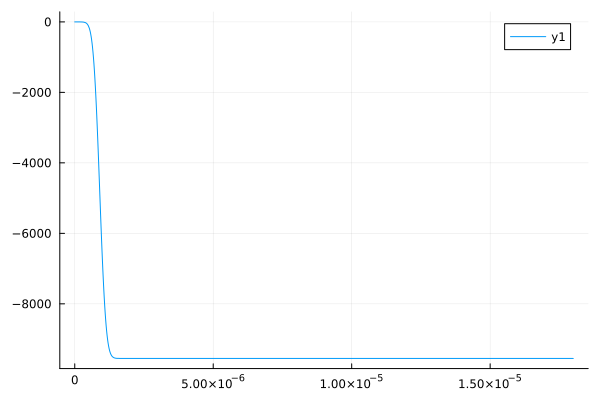

In [9]:
hS_pf = uMax/100
F_ϕ(x) = (phiMin - phiMaxApp) * interval(x,-4*hS_pf+uMin,uTran2_EP)
wₕ(x,x₁) = (1/(sqrt(2*pi)*hS_pf))*exp(-(x-x₁)^2/(2*hS_pf^2))
smoothϕ = SymPy.integrate(F_ϕ(x₁)*wₕ(x,x₁),(x₁,-4*hS_pf,uMax)) +  phiMaxApp
plot(smoothϕ,0,uMax)

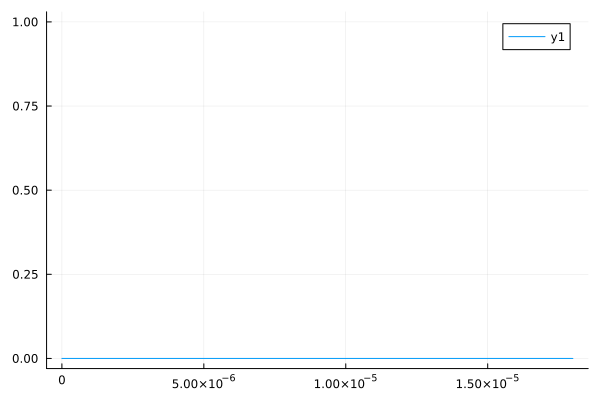

In [10]:
function Tfun(u)  
    if u <= uTran_Temp
      return ((TAppMax - T0)/uTran_Temp)*u + T0
    else
     return  TAppMax
    end
end 
plot(Tfun,0,uMax)

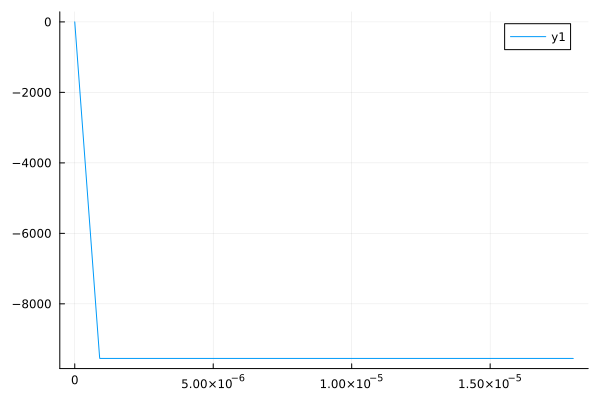

In [11]:
function ϕ_fun(ϕ)  
    if ϕ <= uTran2_EP
      return ((phiMaxApp - phiMin)/uTran2_EP)*ϕ + phiMin
    else
     return  phiMaxApp
    end
end 
plot(ϕ_fun,0,uMax)

In [12]:
uAppVec = range(0,uMax,length = Int64(floor(tMax/delt)))

AppTOption = 1 ## 1 for smooth and otherwise linear than constant

if AppTOption == 1
    TAppVec = smoothT.(uAppVec)
  else
    TAppVec = Tfun.(uAppVec) 
end 

AppϕOption = 2 ## 1 for smooth and otherwise linear than constant

if AppϕOption == 1
    ϕAppVec = smoothϕ.(uAppVec)
  else
    ϕAppVec = ϕ_fun.(uAppVec) 
end 

150-element Vector{Float64}:
     0.0
 -1281.8791946308725
 -2563.758389261745
 -3845.6375838926174
 -5127.51677852349
 -6409.395973154362
 -7691.275167785235
 -8973.154362416108
 -9550.0
 -9550.0
 -9550.0
 -9550.0
 -9550.0
     ⋮
 -9550.0
 -9550.0
 -9550.0
 -9550.0
 -9550.0
 -9550.0
 -9550.0
 -9550.0
 -9550.0
 -9550.0
 -9550.0
 -9550.0

In [13]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

52232-element Vector{Int8}:
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 ⋮
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6

In [14]:
const Mat_tag = get_tag_from_name(labels,"Domain")

6

## Input paramters for Piezo-Electric Material Properties

#### Input elasticity parameters

In [15]:
const c = 350
const ρ = 7500.0

7500.0

#### Input fracture parameters

In [16]:
const Gc = 300
const η = 1e-8

1.0e-8

## COnstitutive Matrices

### Elastic stiffness tensor

In [17]:
const C₁₁_mat = 139e9
const C₁₂_mat = 74.3e9
const C₂₂_mat = 113e9
const C₆₆_mat = 25.6e9

2.56e10

In [18]:
function ElasFourthOrderConstTensor(C₁₁,C₁₂,C₂₂,C₆₆)
      C1111 = C₁₁
      C1122 = C₁₂
      C1112 = 0.0
      C2222 = C₂₂
      C2212 = 0.0
      C1212 = C₆₆    
      C_ten = SymFourthOrderTensorValue(C1111,C1112,C1122,C1112,C1212,C2212,C1122,C2212,C2222)
    return  C_ten
end
const C_mat = ElasFourthOrderConstTensor(C₁₁_mat,C₁₂_mat,C₂₂_mat,C₆₆_mat)
C_mattransformed = zeros(2,2,2,2)

Q = [0 1; -1 0]
for i in 1:2, j in 1:2, k in 1:2, l in 1:2
    for m in 1:2, n in 1:2, o in 1:2, p in 1:2
        C_mattransformed[i,j,k,l] += Q[i,m]*Q[j,n]*Q[k,o]*Q[l,p]*C_mat[m,n,o,p]
    end
end
Ctrans = SymFourthOrderTensorValue(C_mattransformed[1,1,1,1],C_mattransformed[1,1,1,2],C_mattransformed[1,1,2,2],C_mattransformed[1,1,1,2],C_mattransformed[1,2,1,2],C_mattransformed[2,2,1,2],C_mattransformed[1,1,2,2],C_mattransformed[2,2,1,2],C_mattransformed[2,2,2,2])

SymFourthOrderTensorValue{2, Float64, 9}(1.13e11, 0.0, 7.43e10, 0.0, 2.56e10, 0.0, 7.43e10, 0.0, 1.39e11)

### Third order piezoelectric tensor

In [19]:
const e₂₁_mat = -6.98
const e₂₂_mat = 13.84
const e₁₆_mat = 13.44

13.44

In [20]:
function PiezoThirdOrderConstTensor(e₂₁,e₂₂,e₁₆)
    # 1 for Plane Stress and 2 Plane Strain Condition 
      e111 = 0.0
      e112 = e₁₆
      e121 = e₁₆
      e122 = 0.0
      e211 = e₂₁
      e212 = 0.0
      e221 = 0.0
      e222 = e₂₂   
    vals = zeros(2,2,2);
    vals[1,:,:] .= [e111 e112
                    e121 e122]
    vals[2,:,:] .= [e211 e212
                    e221 e222]
    e_ten = ThirdOrderTensorValue(vals ...)
    return  e_ten
end
const e_mat = PiezoThirdOrderConstTensor(e₂₁_mat,e₂₂_mat,e₁₆_mat)

e_mattransformed = zeros(2,2,2)

Q = [0 1; -1 0]
for i in 1:2
    for j in 1:2 
        for k in 1:2 
            for m in 1:2
                for n in 1:2
                   for o in 1:2
                        e_mattransformed[i,j,k] += Q[i,m]*Q[j,n]*Q[k,o]*e_mat[m,n,o]
                    end
                end
            end
        end
    end
end
e_mattrans = ThirdOrderTensorValue(e_mattransformed ...)

ThirdOrderTensorValue{2, 2, 2, Float64, 8}(13.84, 0.0, 0.0, 13.44, 0.0, 13.44, -6.98, 0.0)

### Second order electrical permittivity tensor

In [21]:
const K₁₁_mat = 5.47e-9
const K₂₂_mat = 6e-9

6.0e-9

In [22]:
const K_mat = TensorValue(K₁₁_mat,0.0,0.0, K₂₂_mat)

TensorValue{2, 2, Float64, 4}(5.47e-9, 0.0, 0.0, 6.0e-9)

### Thermal Coefficient

In [23]:
const α₁₁_mat = 1.97e-6
const α₂₂_mat = 2.62e-6

2.62e-6

In [24]:
const α_mat = TensorValue(α₁₁_mat,0.0,0.0, α₂₂_mat)

TensorValue{2, 2, Float64, 4}(1.97e-6, 0.0, 0.0, 2.62e-6)

In [25]:
κ_mat = 5.1
κGradTemp(∇,s_in) = (s_in^2 + η)*κ_mat*∇

κGradTemp (generic function with 1 method)

## Stress

$\sigma_{elas}(\epsilon(\boldsymbol{u})) =  \mathbb{C}\,\boldsymbol{\epsilon}$

$\sigma_{elasMod}(\epsilon(\boldsymbol{u}),s) =  \mathbb{C}_{mod}\,\boldsymbol{\epsilon}$

$\sigma_{piezo}(\boldsymbol{E}(\phi)) = - \mathbb{e}^T\,\boldsymbol{E}$

or, $\sigma_{piezo}(\nabla\phi) =  \mathbb{e}^T\,\boldsymbol{\nabla}\phi$

$\sigma_{piezoMod}(\nabla\phi,s) =  \mathbb{e}_{mod}^T\,\boldsymbol{\nabla}\phi$

In [26]:
σ_elas(ε) = Ctrans ⊙ ε

function σ_elasMod(ε, T, ε_in, s_in, T_in)
    εElas_in = ε_in - α_mat*(T_in-T0)
    εElas = ε - α_mat*(T-T0)
    if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εElas)
    else
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElas) + I4_vol⊙ σ_elas(εElas)
    end  
    return σ
end

function σ_TotMod1(ε, ε_in, s_in, T_in)
    εElas_in = ε_in - α_mat*(T_in-T0)
    εTot = ε
 if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εTot)
  elseif tr(εElas_in) < 0
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(εTot) + I4_vol⊙ σ_elas(εTot)
  end  
    return σ
end

function σ_TotMod2(T, ε_in, s_in, T_in)
    εElas_in = ε_in - α_mat*(T_in-T0)
    εElas = - α_mat*T
 if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εElas)
  elseif tr(εElas_in) < 0
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElas) + I4_vol ⊙ σ_elas(εElas)
  end  
    return σ
end

function σ_thermMod(ε_in,s_in,T_in)
    
   εElas_in = ε_in - α_mat*(T_in-T0)
   εElasTher = α_mat*(T0)
    if tr(εElas_in)  >= 0
        σF = (s_in^2 + η)*σ_elas(εElasTher)
    elseif tr(εElas_in) < 0
        σF = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElasTher) + I4_vol ⊙ σ_elas(εElasTher)
    end  
    return σF
end

σ_thermMod (generic function with 1 method)

In [27]:
σ_piezo(∇) = ∇ ⋅ e_mattrans

σ_piezoMod(∇, s_in) = (s_in^2 + η)*σ_piezo(∇)

σ_piezoMod (generic function with 1 method)

### Electric Displacement

$\boldsymbol{D}_{elas}(ε(\boldsymbol{u}),tag) = \mathbb{e}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{elasMod}(ε(\boldsymbol{u}),s,tag) = \mathbb{e}_{mod}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{piezo}(\boldsymbol{E}(\phi)) = -\boldsymbol{K}\boldsymbol{E} $

or, $\boldsymbol{D}_{piezo}(\nabla\phi)  = \boldsymbol{K}\boldsymbol{\nabla} \phi$

$\boldsymbol{D}_{piezoMod}(\nabla\phi,s)  = \boldsymbol{K}_{mod}\boldsymbol{\nabla} \phi$

In [28]:
function D_elasMod1(ε, s_in)
    εElas = ε
    return (s_in^2 + η)*(e_mattrans ⋅² εElas)
end

function D_elasMod2(T, s_in)
    εElas = - α_mat*T
    return (s_in^2 + η)*(e_mattrans ⋅² εElas)
end

function D_ThermMod(s_in)
    εElas = α_mat*T0
    return (s_in^2 + η)*(e_mattrans ⋅² εElas)
end

D_ThermMod (generic function with 1 method)

In [29]:
D_piezo(∇) = K_mat ⋅ ∇

function D_piezoMod(∇, s_in)   
    return (s_in^2 + η)*D_piezo(∇)
end

D_piezoMod (generic function with 1 method)

In [30]:
function ψPos(ε_in, T_in, ∇_in)
    εElas_in = ε_in - α_mat*(T_in-T0)
    if tr(εElas_in) >= 0
        ψPlus = 0.5*(εElas_in ⊙ σ_elas(εElas_in))
    elseif tr(εElas_in) < 0
        ψPlus = 0.5*((I4_dev ⊙ σ_elas(εElas_in)) ⊙ (I4_dev ⊙ εElas_in)) 
    end
    return ψPlus
end

ψPos (generic function with 1 method)

In [31]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

## FE formulation

In [32]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = Gridap.solve(op)
  qh
end

project (generic function with 1 method)

In [33]:
order = 1
degree = 2*order

2

In [34]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [35]:
LoadTagId = get_tag_from_name(labels,"LoadLine")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 33
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 656941044352017285

In [36]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 52232
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 16920488276458578726

In [37]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["DirichletLeft","DirichletRight","LoadLine"],
          dirichlet_masks=[(true,true), (false,true),(false,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 52232
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 16920488276458578726

In [38]:
reffe_ElecPot = ReferenceFE(lagrangian,Float64,order)
V0_ElecPot  = TestFESpace(model,reffe_ElecPot;
  conformity=:H1,
  dirichlet_tags=["ElectricPotentialTempLeft","ElectricPotentialTempRight"])
ϕh = zero(V0_ElecPot)

SingleFieldFEFunction():
 num_cells: 52232
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 16920488276458578726

In [39]:
reffe_Temp = ReferenceFE(lagrangian,Float64,order)
V0_Temp = FESpace(model,reffe_Temp;
  conformity=:H1,
  dirichlet_tags=["ElectricPotentialTempLeft","ElectricPotentialTempRight"])
Th = zero(V0_Temp)

SingleFieldFEFunction():
 num_cells: 52232
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 16920488276458578726

In [40]:
V0 = MultiFieldFESpace([V0_Disp,V0_ElecPot,V0_Temp])

MultiFieldFESpace()

In [41]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ  + (Gc/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = Gridap.solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [42]:
 function   stepDispElecPotTemp(uh_in,phih_in,Th_in,sh_in,vApp,phiApp,TApp,delt)
    
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(0.0,0.0)
        uApp3(x) = VectorValue(0.0,-vApp)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2,uApp3])
    
        phiApp1(x) = 0.0
        phiApp2(x) = phiApp
        U_ElecPot = TrialFESpace(V0_ElecPot,[phiApp1,phiApp2])
    
        Tapp1(x) = T0
        Tapp2(x) = TApp
        U_Temp = TrialFESpace(V0_Temp,[Tapp1,Tapp2])
    
        U = MultiFieldFESpace([U_Disp,U_ElecPot,U_Temp])
    
        a((u,ϕ,T),(v,φ,ϑ)) = ∫( ((ε(v)) ⊙ (σ_TotMod1∘(ε(u), ε(uh_in), sh_in, Th_in))) 
                              + ((ε(v)) ⊙ (σ_TotMod2∘(T, ε(uh_in), sh_in, Th_in)))
                              + ((ε(v)) ⊙ (σ_piezoMod∘(∇(ϕ), sh_in)))
                              - ((∇(φ))⋅(D_piezoMod∘(∇(ϕ), sh_in))) 
                              + ((∇(φ))⋅(D_elasMod1∘(ε(u), sh_in)))
                              + ((∇(φ))⋅(D_elasMod2∘(T, sh_in)))
                              + ((∇(ϑ))⋅(κGradTemp∘(∇(T),sh_in))) 
                              + (ϑ*((ρ*c*T)/delt)) )*dΩ
        b((v,φ,ϑ)) = ∫( -(ε(v) ⊙ (σ_thermMod∘(ε(uh_in),sh_in,Th_in)))
                      - (∇(φ)⋅(D_ThermMod∘(sh_in))) 
                      + (ϑ*((ρ*c*Th_in)/delt)) )*dΩ
    
        op = AffineFEOperator(a,b,U,V0)
        uhPhi = Gridap.solve(op)
        uh_out,phih_out,Th_out = uhPhi
    
    return uh_out,phih_out,Th_out
end

stepDispElecPotTemp (generic function with 1 method)

In [43]:
cd("ElectricPotention_5.0")

In [44]:
t = 0.0
innerMax = 10
count = 0
tol = 1e-8

Load = Float64[]
Displacement = Float64[]

push!(Load, 0.0)
push!(Displacement, 0.0)


ψPlusPrev = CellState(0.0,dΩ) 
sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ThPrev = CellState(T0,dΩ)
Th = project(ThPrev,model,dΩ,order)
ϕPrev = CellState(0.0,dΩ)
ϕh = project(ϕPrev,model,dΩ,order)


while t .< tMax 
    count = count .+ 1      
    t = t + delt
    vApp = AppVel*t    
    TApp = TAppVec[count]
    phiApp = ϕAppVec[count]
    
    
    print("\n Entering displacemtent step$count :", float(vApp))
    
   for inner = 1:innerMax   
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        RelErr = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error = ",float(RelErr))
        
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh,ϕh,Th = stepDispElecPotTemp(uh,ϕh,Th,sh,vApp,phiApp,TApp,delt)
        
        ψhPos_in = ψPos∘(ε(uh),Th,∇(ϕh))      
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
  
        if RelErr < 1e-8
            break 
        end      
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_elasMod∘(ε(uh),Th,ε(uh),sh,Th)) ) *dΓ_Load + ∫( n_Γ_Load ⋅ (σ_piezoMod∘(∇(ϕh),sh) ) )  *dΓ_Load)
    
    push!(Load, Node_Force[2])
    push!(Displacement, vApp)
    if mod(count,100) == 0
         writevtk(Ω,"results_TPBhorizontalEMATTRANS_0_$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"phi"=>ϕh, "epsi"=>ε(uh),"T" => Th])
    end
end


 Entering displacemtent step1 :1.2000000000000002e-7
 Relative error = 2.779657387300097e-17
 Entering displacemtent step2 :2.4000000000000003e-7
 Relative error = 4.1972604583901204e-7
 Relative error = 1.3363327516254525e-5
 Relative error = 5.208232579023444e-10
 Entering displacemtent step3 :3.6000000000000005e-7
 Relative error = 1.870598111728629e-13
 Entering displacemtent step4 :4.800000000000001e-7
 Relative error = 3.7701462820725026e-5
 Relative error = 6.209313068950956e-5
 Relative error = 1.3870804843856135e-8
 Relative error = 3.152666258571425e-11
 Entering displacemtent step5 :6.000000000000001e-7
 Relative error = 8.63480928750781e-14
 Entering displacemtent step6 :7.200000000000001e-7
 Relative error = 8.646681639022126e-5
 Relative error = 0.0001108605438966871
 Relative error = 6.41584606509559e-8
 Relative error = 3.757608105461741e-10
 Entering displacemtent step7 :8.400000000000001e-7
 Relative error = 2.6687525132727246e-12
 Entering displacemtent step8 :9.600

 Relative error = 2.338545242488257e-6
 Relative error = 1.0215871075813435e-6
 Relative error = 4.5988278920762293e-7
 Relative error = 2.088755170343531e-7
 Relative error = 9.517369076686643e-8
 Relative error = 4.342483738561022e-8
 Relative error = 1.9838305976157704e-8
 Entering displacemtent step89 :1.0680000000000001e-5
 Relative error = 9.030751159632886e-9
 Entering displacemtent step90 :1.0800000000000002e-5
 Relative error = 6.874583912628307e-5
 Relative error = 7.780541863636576e-5
 Relative error = 6.670844866345048e-6
 Relative error = 2.7104585492916568e-6
 Relative error = 1.2563257402381562e-6
 Relative error = 5.99917971240983e-7
 Relative error = 2.891618617228724e-7
 Relative error = 1.3973125251007004e-7
 Relative error = 6.776337991135864e-8
 Relative error = 3.273330570432184e-8
 Entering displacemtent step91 :1.0920000000000002e-5
 Relative error = 1.5913711239859078e-8
 Relative error = 6.930979395790156e-5
 Relative error = 5.078512905446634e-6
 Relative err

 Relative error = 2.4876174659502505e-5
 Relative error = 2.424735174265765e-5
 Relative error = 2.3643755405870164e-5
 Entering displacemtent step126 :1.5120000000000003e-5
 Relative error = 2.303436170358095e-5
 Relative error = 3.8992100423323285e-5
 Relative error = 2.8417179931263576e-5
 Relative error = 2.647837196545087e-5
 Relative error = 2.545039292264404e-5
 Relative error = 2.466426966509956e-5
 Relative error = 2.3992740517015522e-5
 Relative error = 2.336567896931516e-5
 Relative error = 2.2739405575573506e-5
 Relative error = 2.213448764340497e-5
 Entering displacemtent step127 :1.5240000000000001e-5
 Relative error = 2.156832977561932e-5
 Relative error = 3.704464522698537e-5
 Relative error = 2.6834303316624422e-5
 Relative error = 2.4916027842671375e-5
 Relative error = 2.393428169838228e-5
 Relative error = 2.3202438278846794e-5
 Relative error = 2.2536597663750243e-5
 Relative error = 2.190204995555598e-5
 Relative error = 2.131603984015217e-5
 Relative error = 2.07

In [45]:
 writevtk(Ω,"results_TPBhorizontalEMATTRANS_0_$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"phi"=>ϕh, "epsi"=>ε(uh),"T" => Th])

(["results_TPBhorizontalEMATTRANS_0_150.vtu"],)

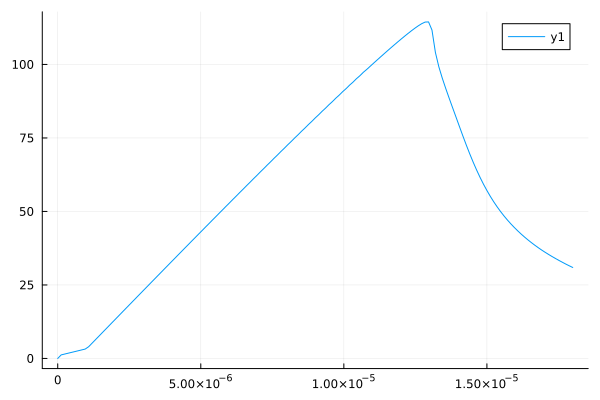

In [46]:
plot(Displacement,(-Load)*10^-3)

In [47]:
maximum(-Load*10^-3)

114.46709051498304

In [48]:
cd("../DataLoadDisp")

In [49]:
using DelimitedFiles
Disp = writedlm("DispDataResultTPB_0_5.0V.csv",  Displacement, ',')
Force = writedlm("LoadDataResultTPB_0_5.0V.csv",  Load, ',')